In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold

In [25]:
HCV_Data = pd.read_csv('C:/Users/DELL/Downloads/hepatitis+c+virus+hcv+for+egyptian+patients/HCV-Egy-Data.csv')
HCV_Data.head()

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,...,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading,Baselinehistological staging
0,56,1,35,2,1,1,1,2,2,2,...,5,5,5,655330,634536,288194,5,5,13,2
1,46,1,29,1,2,2,1,2,2,1,...,57,123,44,40620,538635,637056,336804,31085,4,2
2,57,1,33,2,2,2,2,1,1,1,...,5,5,5,571148,661346,5,735945,558829,4,4
3,49,2,33,1,2,1,2,1,2,1,...,48,77,33,1041941,449939,585688,744463,582301,10,3
4,59,1,32,1,1,2,1,2,2,2,...,94,90,30,660410,738756,3731527,338946,242861,11,1


In [26]:
HCV_Data.isnull().sum()

Age                                 0
Gender                              0
BMI                                 0
Fever                               0
Nausea/Vomting                      0
Headache                            0
Diarrhea                            0
Fatigue & generalized bone ache     0
Jaundice                            0
Epigastric pain                     0
WBC                                 0
RBC                                 0
HGB                                 0
Plat                                0
AST 1                               0
ALT 1                               0
ALT4                                0
ALT 12                              0
ALT 24                              0
ALT 36                              0
ALT 48                              0
ALT after 24 w                      0
RNA Base                            0
RNA 4                               0
RNA 12                              0
RNA EOT                             0
RNA EF      

In [27]:
def check_outlier_locations(Data):
    Data2 = Data.describe()
    columns = Data2.columns
    outlier_mask = pd.DataFrame(False, index=Data.index, columns=columns)
    for i in columns:
        Q1 = Data2[i]['25%']
        Q3 = Data2[i]['75%']
        IQR = Q3 - Q1
        lim1 = Q1 - 1.5 * IQR
        lim2 = Q3 + 1.5 * IQR
        outlier_mask[i] = (Data[i] > lim2) | (Data[i] < lim1)
    rows_with_outliers = outlier_mask[outlier_mask.any(axis=1)]
    return rows_with_outliers

outlier_map = check_outlier_locations(HCV_Data)
print(outlier_map)

      Age   Gender    BMI  Fever  Nausea/Vomting  Headache   Diarrhea   \
0    False   False  False  False           False      False      False   
2    False   False  False  False           False      False      False   
4    False   False  False  False           False      False      False   
457  False   False  False  False           False      False      False   

     Fatigue & generalized bone ache   Jaundice   Epigastric pain   ...  \
0                               False      False             False  ...   
2                               False      False             False  ...   
4                               False      False             False  ...   
457                             False      False             False  ...   

     ALT 36  ALT 48  ALT after 24 w  RNA Base  RNA 4  RNA 12  RNA EOT  RNA EF  \
0     False   False            True     False  False   False    False   False   
2     False   False            True     False  False   False    False   False   
4     Fals

In [28]:
HCV_Data.loc[[0,2,4,457]][['ALT after 24 w' ,'RNA 12','Baselinehistological staging']]

,ALT after 24 w,RNA 12,Baselinehistological staging
0,5,288194,2
2,5,5,4
4,30,3731527,1
457,5,5,4


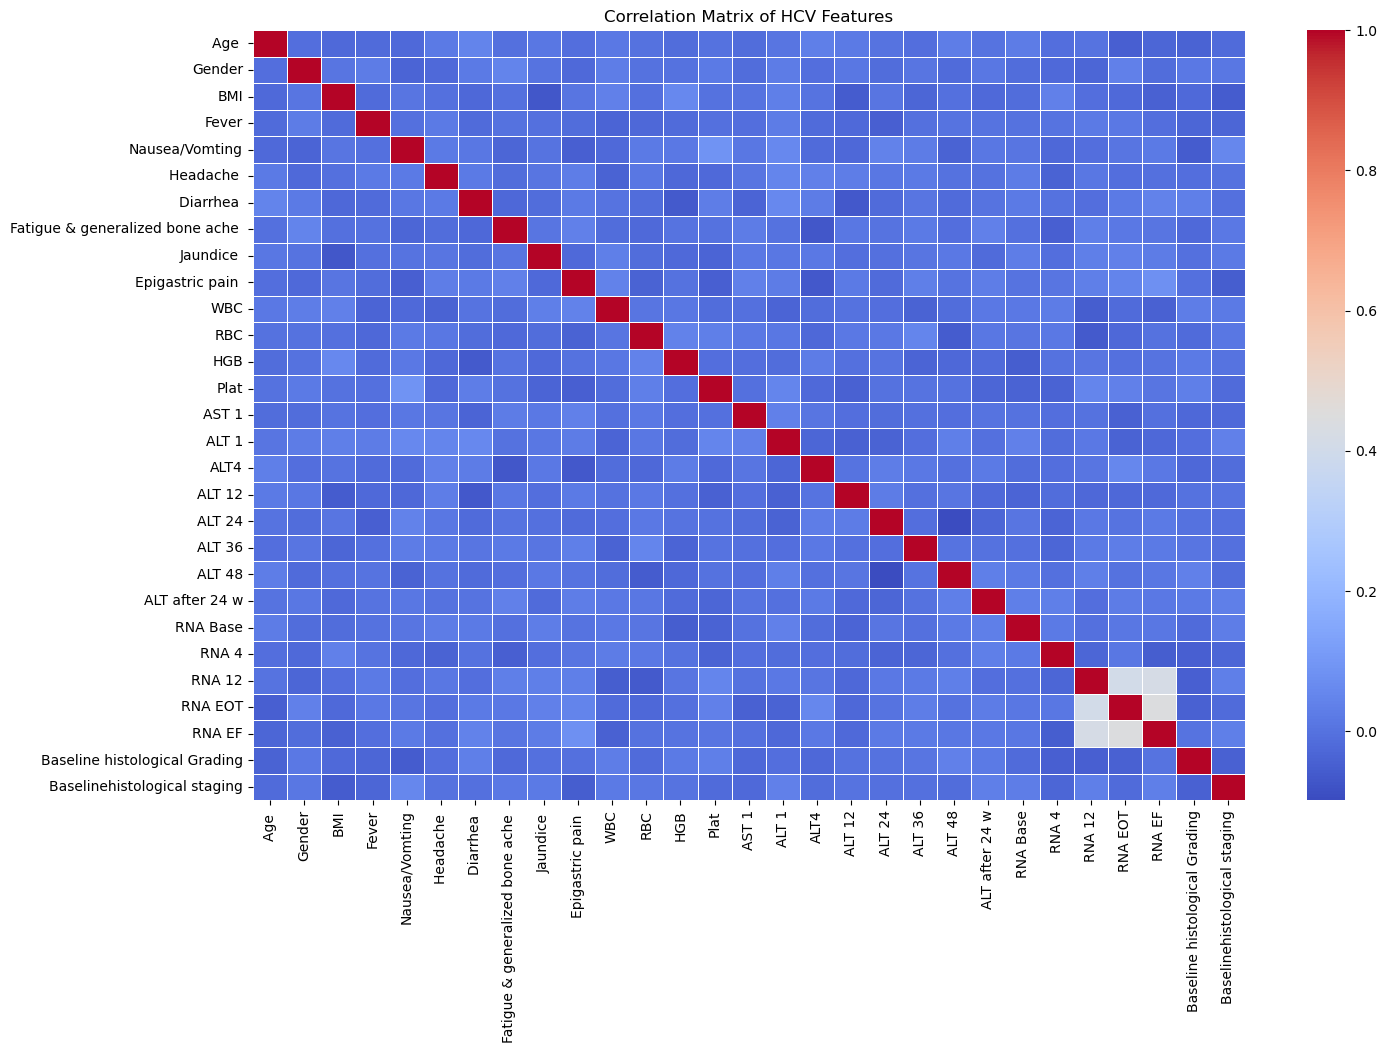

<Figure size 640x480 with 0 Axes>

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = HCV_Data.corr()

plt.figure(figsize=(16, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of HCV Features')
plt.show()
plt.savefig("sine_wave.png", dpi=300, bbox_inches='tight')

In [30]:
# threshold = 0 removes features with exactly zero variance
vt = VarianceThreshold(threshold=0.01)
vt.fit(HCV_Data)
variances = pd.Series(vt.variances_, index=HCV_Data.columns)
low_variance_features = variances[variances < 0.01]
low_variance_features

Series([], dtype: float64)

In [31]:
HCV_Data["Label"] = HCV_Data["Baselinehistological staging"].replace({
    1:0,
    2:0,
    3:1,
    4:1
})
HCV_Data = HCV_Data.drop("Baselinehistological staging",axis=1)

In [32]:
Y = HCV_Data["Label"]
X = HCV_Data.drop(["Label"], axis=1)

In [33]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X,Y,test_size=0.3,random_state=101)

In [34]:
from sklearn.feature_selection import SelectKBest, f_classif

anova = SelectKBest(score_func=f_classif, k=10)
X_Train_anova = anova.fit_transform(X_Train, Y_Train)
X_Test_anova = anova.transform(X_Test)

selected_features = X_Train.columns[anova.get_support()]


In [35]:
#Features were ranked using mutual information
from sklearn.feature_selection import mutual_info_classif

mi_scores = mutual_info_classif(X_Train, Y_Train)
mi_series = pd.Series(mi_scores, index=X_Train.columns)

selected_features_mi = mi_series.sort_values(ascending=False).head(10).index

X_train_mi = X_Train[selected_features_mi]
X_test_mi = X_Test[selected_features_mi]


In [36]:
X_train_mi.columns

Index(['WBC', 'Headache ', 'Baseline histological Grading', 'ALT 12', 'ALT 1',
       'RNA 12', 'RNA EF', 'ALT 24', 'ALT 48', 'RBC'],
      dtype='object')

In [37]:
selected_features

Index(['Gender', 'BMI', 'Fever', 'Jaundice ', 'Epigastric pain ', 'HGB',
       'ALT after 24 w', 'RNA EOT', 'RNA EF', 'Baseline histological Grading'],
      dtype='object')

In [38]:
Scaler = StandardScaler()
X_Train_anova = Scaler.fit_transform(X_Train_anova)
X_Test_anova = Scaler.fit_transform(X_Test_anova)

X_train_mi = Scaler.fit_transform(X_train_mi)
X_test_mi = Scaler.fit_transform(X_test_mi)

In [39]:
Y_Train2 = Y_Train
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_Train_anova, Y_Train_resampled = smote.fit_resample(
    X_Train_anova, Y_Train
)

X_train_mi, Y_Train_resampled2 = smote.fit_resample(
    X_train_mi, Y_Train2
)
from collections import Counter

print("Before SMOTE:", Counter(Y_Train))
print("After SMOTE:", Counter(Y_Train_resampled))


Before SMOTE: Counter({1: 517, 0: 452})
After SMOTE: Counter({0: 517, 1: 517})


In [40]:
#Comparing feature selection methods

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

lr_anova = LogisticRegression(
    max_iter=1000,
    class_weight='balanced',
    random_state=42
)

lr_anova.fit(X_Train_anova, Y_Train_resampled)


auc_anova = roc_auc_score(Y_Test, lr_anova.predict_proba(X_Test_anova)[:, 1])

print("ANOVA AUC:", auc_anova)

lr_mi = LogisticRegression(
    max_iter=1000,
    class_weight='balanced',
    random_state=42
)

lr_mi.fit(X_train_mi, Y_Train_resampled)

auc_mi = roc_auc_score(Y_Test, lr_mi.predict_proba(X_test_mi)[:, 1])

print("Mutual Information AUC:", auc_mi)


ANOVA AUC: 0.4894212962962963
Mutual Information AUC: 0.517986111111111


In [41]:
from sklearn.ensemble import RandomForestClassifier

rf_anova = RandomForestClassifier(random_state=42)
rf_anova.fit(X_Train_anova, Y_Train_resampled)

rf_mi = RandomForestClassifier(random_state=42)
rf_mi.fit(X_train_mi, Y_Train_resampled)

auc_rf_anova = roc_auc_score(
    Y_Test,
    rf_anova.predict_proba(X_Test_anova)[:, 1]
)

auc_rf_mi = roc_auc_score(
    Y_Test,
    rf_mi.predict_proba(X_test_mi)[:, 1]
)

print("RF + ANOVA AUC:", auc_rf_anova)
print("RF + MI AUC:", auc_rf_mi)


RF + ANOVA AUC: 0.5320023148148149
RF + MI AUC: 0.514548611111111


In [42]:
from scipy.stats import pearsonr

correlations = {}
for col in X.columns:
    # Skip non-numeric or check
    if pd.api.types.is_numeric_dtype(X[col]):
        corr, _ = pearsonr(X[col].fillna(X[col].mean()), Y)
        correlations[col] = abs(corr)  # Absolute value

sorted_corrs = sorted(correlations.items(), key=lambda x: x[1], reverse=True)
print("Top 20 features by absolute correlation:")
for feature, corr in sorted_corrs[:20]:
    print(f"  {feature}: {corr:.4f}")

top_features = [f for f, _ in sorted_corrs[:10]]
X_corr = X[top_features]

Top 20 features by absolute correlation:
  BMI: 0.0700
  Nausea/Vomting: 0.0598
  RNA EF: 0.0553
  Epigastric pain : 0.0472
  Baseline histological Grading: 0.0410
  Gender: 0.0405
  ALT after 24 w: 0.0373
  RNA Base: 0.0358
  RNA 4: 0.0324
  RNA 12: 0.0298
  Age : 0.0247
  ALT 1: 0.0230
  Plat: 0.0207
  Fever: 0.0192
  AST 1: 0.0142
  ALT 48: 0.0118
  RNA EOT: 0.0103
  WBC: 0.0084
  ALT4: 0.0080
  ALT 24: 0.0048


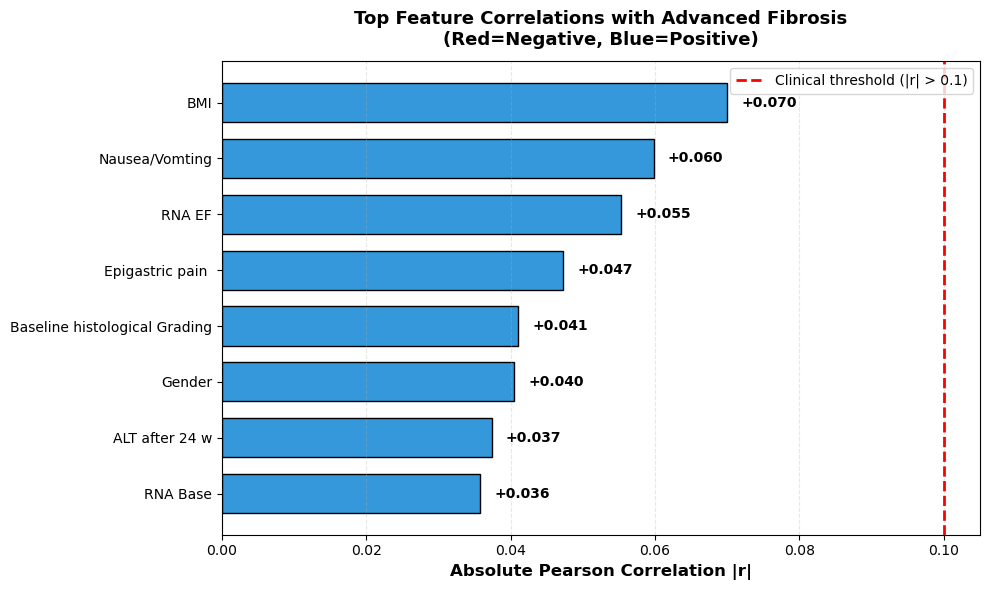

In [48]:
vis_features = [f for f, _ in sorted_corrs[:8]]
vis_correlations = [correlations[f] for f in vis_features]

plt.figure(figsize=(10, 6))

# Create horizontal bars
bars = plt.barh(vis_features, [abs(c) for c in vis_correlations], 
                color=['#e74c3c' if c < 0 else '#3498db' for c in vis_correlations],
                height=0.7, edgecolor='black', linewidth=1)

# Paper's clinical significance threshold
plt.axvline(x=0.1, color='red', linestyle='--', linewidth=2, 
            label='Clinical threshold (|r| > 0.1)')

# Add correlation values with signs
for bar, corr in zip(bars, vis_correlations):
    plt.text(bar.get_width() + 0.002, bar.get_y() + bar.get_height()/2, 
             f'{corr:+.3f}', va='center', fontweight='bold', fontsize=10)

plt.xlabel('Absolute Pearson Correlation |r|', fontsize=12, fontweight='bold')
plt.title('Top Feature Correlations with Advanced Fibrosis\n(Red=Negative, Blue=Positive)', 
          fontsize=13, fontweight='bold', pad=12)
plt.gca().invert_yaxis()  # Highest correlation at top
plt.grid(axis='x', alpha=0.3, linestyle='--')
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()